Final Project Check-in 2018-11-14
------

Group Name
-----

Student Names
----

1. Rebecca Reilly
2. Viviana Marquez
3. Victoria Suarez
4. Fiorella Tenorio
5. Katja Wittfoth 

Load Data
-----

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction import stop_words
import string
import re

In [2]:
def clean_lyrics(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w for w in words if len(w) > 2]  # ignore a, an, to, at, be, ...
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stop_words.ENGLISH_STOP_WORDS]
    return words

In [3]:
df = pd.read_csv('../Final Project/Data/lyrics.csv')

In [4]:
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']
df['lyrics_clean'] = df.lyrics.apply(clean_lyrics)

In [5]:
df_clean = df[(df.genre == 'Country') | (df.genre == 'Metal') | (df.genre == 'Hip-Hop') | (df.genre == 'Jazz')
       | (df.genre == 'Electronic')]

Fit scikit-learn model
----

In [6]:
train, test = train_test_split(df_clean, test_size=0.2)
train_lyrics = train['lyrics']
train_genre = train['genre']

In [7]:
pipeline = Pipeline([('vect', CountVectorizer(stop_words='english', 
                                              lowercase=True, 
                                              analyzer = 'word', 
                                              )),
                     ('clf', MultinomialNB(alpha=.1))]) 

In [8]:
pipeline.fit(train_lyrics, train_genre)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [10]:
pred = pipeline.predict(test['lyrics'])

Evaluation Metric
----

In [11]:
con_mat = confusion_matrix(test['genre'], pred)

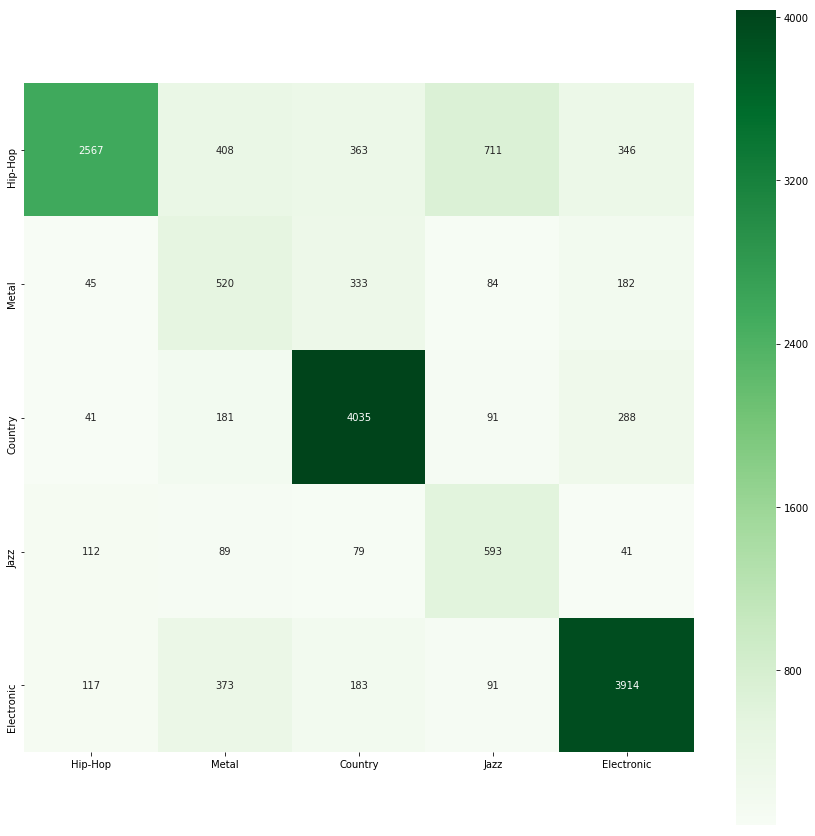

In [14]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(con_mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=df_clean.genre.unique(), yticklabels=df_clean.genre.unique(), cmap="Greens")

In [15]:
accuracy_score(pred, test['genre']) 

0.7366187369354532